# Corn data

In [7]:
library(lme4)
library(lmerTest)
library(lattice)
library(DAAG)

Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



In [27]:
?ant111b

In [9]:
merModLmerTest <- setClass("merModLmerTest",contains = c("merMod", "lmerMod"))

### 1 Explore the data

In [10]:
str(ant111b)
summary(ant111b)

'data.frame':	32 obs. of  9 variables:
 $ site  : Factor w/ 8 levels "DBAN","LFAN",..: 1 2 3 4 5 6 7 8 1 2 ...
 $ parcel: Factor w/ 4 levels "I","II","III",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ code  : num  58 58 58 58 58 58 58 58 58 58 ...
 $ island: num  1 1 1 1 1 1 1 1 1 1 ...
 $ id    : num  3 40 186 256 220 ...
 $ plot  : num  3 4 5.5 4.5 3.5 5 7 7 15.5 15 ...
 $ trt   : num  111 111 111 111 111 111 111 111 111 111 ...
 $ ears  : num  43.5 40.5 20 42.5 31.5 32.5 43.5 50 46 46.5 ...
 $ harvwt: num  5.16 2.93 1.73 6.79 3.25 ...


      site   parcel       code        island        id              plot      
 DBAN   :4   I  :8   Min.   :58   Min.   :1   Min.   :  3.00   Min.   : 3.00  
 LFAN   :4   II :8   1st Qu.:58   1st Qu.:1   1st Qu.: 74.62   1st Qu.:10.38  
 NSAN   :4   III:8   Median :58   Median :1   Median :145.75   Median :18.75  
 ORAN   :4   IV :8   Mean   :58   Mean   :1   Mean   :144.47   Mean   :18.47  
 OVAN   :4           3rd Qu.:58   3rd Qu.:1   3rd Qu.:214.25   3rd Qu.:26.00  
 TEAN   :4           Max.   :58   Max.   :1   Max.   :283.50   Max.   :33.50  
 (Other):8                                                                    
      trt           ears           harvwt     
 Min.   :111   Min.   :20.00   Min.   :1.490  
 1st Qu.:111   1st Qu.:40.12   1st Qu.:3.103  
 Median :111   Median :43.00   Median :4.420  
 Mean   :111   Mean   :41.22   Mean   :4.292  
 3rd Qu.:111   3rd Qu.:45.62   3rd Qu.:5.261  
 Max.   :111   Max.   :56.00   Max.   :7.365  
                                       

Dotplot of the number of ears by site, sorting by mean ears:

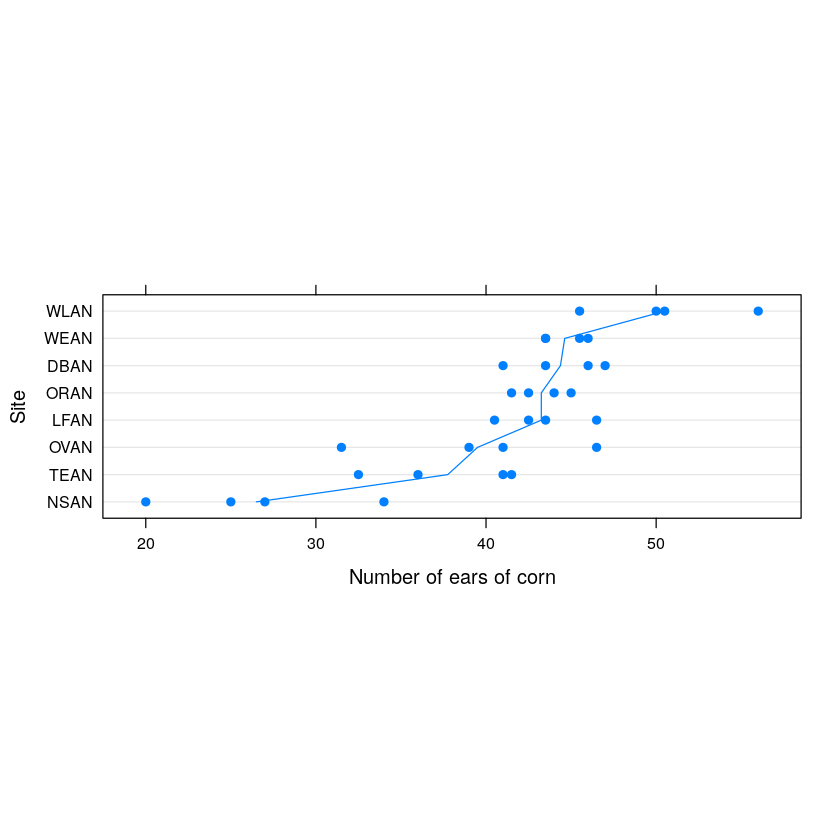

In [11]:
dotplot(reorder(site, ears) ~ ears, ant111b, xlab = "Number of ears of corn",
ylab = "Site", pch = 19, aspect = 0.32, type = c("p", "a"))

Yes, some effects seem to contribute to the variation in ears

### 2  Use lmer to fit a random effects model

Use a random effects model
of the form $y_{ij} = \mu + b_i + \epsilon_{ij}$, and look at the results.

You can use extractor
methods (e.g. fixef, ranef, fitted, etc.) to extract components from the resulting `mer` object.

In [12]:
# The first 1 results in one fixed effect parameter
# (1 | site) results in one random effect term
# This generates a simple, scalar random effect for each level of `site`
(ears.lmer <- lmer(ears ~ 1 + (1 | site), data=ant111b))

Linear mixed model fit by REML ['lmerModLmerTest']
Formula: ears ~ 1 + (1 | site)
   Data: ant111b
REML criterion at convergence: 194.7784
Random effects:
 Groups   Name        Std.Dev.
 site     (Intercept) 6.76    
 Residual             3.98    
Number of obs: 32, groups:  site, 8
Fixed Effects:
(Intercept)  
      41.22  

There are two sources of random variation, one for site and one for parcel within site (residual), each with an estimated variance (and
SD).

a. Find the grand mean

In [35]:
# Extract the fixed-effects estimates
fixef(ears.lmer)

(Intercept) 
   41.21875

b. Make a table showing the sample mean and fitted value for each site (there is sample code in the slides from the lecture). Note that the fitted values are not just
the sample means, but are between the grand mean and individual group sample means.

In [44]:
# Extract fitted values from objects returned by modeling functions
# fitted(ears.lmer)
means <- with(ant111b, sapply(split(ears, site), mean))
siteFit <- with(ant111b, sapply(split(fitted(ears.lmer),
site), mean))
print(data.frame(mean = means, fitted = siteFit))

       mean   fitted
DBAN 44.375 44.12331
LFAN 43.250 43.08802
NSAN 26.500 27.67371
ORAN 43.250 43.08802
OVAN 39.500 39.63706
TEAN 37.750 38.02661
WEAN 44.625 44.35338
WLAN 50.500 49.75989


c. Give the estimated variance for each source of variation, $\sigma^2_\text{site}$ and $\sigma^2_\text{Residual}$.

In [48]:
6.76^2/(6.76^2+3.98^2)

[1] 0.7425916



The estimated variance components are $\sigma^2_\text{site}=6.76^2$ and $\sigma^2_\text{Residual}=3.98^2$

$\sigma^2_\text{site}$ is larger. The proportion of variation due to `site` is $$\frac{\sigma^2_\text{site}}{\sigma^2_\text{site}+\sigma^2_\text{Residual}}=74\%$$

Which source of variation is larger? What proportion of variation is due to
differences between sites?

d. Make a caterpillar plot for the random effects. Does the plot support your conclusion about the source of variation? Which site(s) are most 'unusual'?

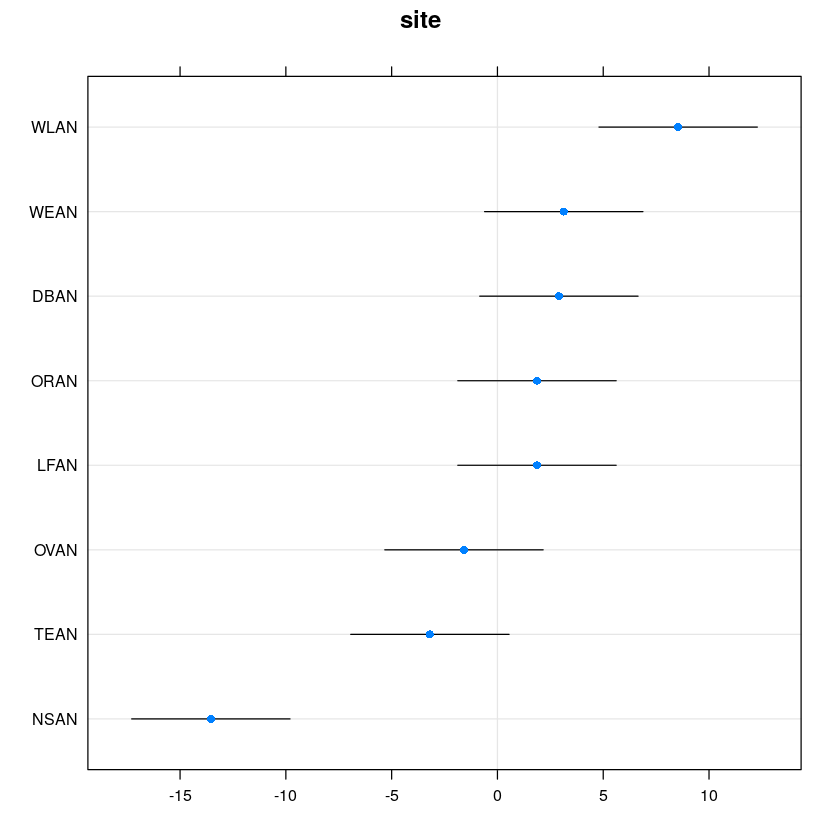

In [45]:
# Caterpillar plot (95% prediction interval)
dotplot(ranef(ears.lmer, condVar = TRUE), strip = FALSE)[[1]]

### 3 Use the function update with option REML = FALSE
to re-fit the model to obtain ML, rather than REML, estimates.

How do the
estimates compare?


In [46]:
# Re-fitting the model for ML estimates
(ears.lmer1 <- update(ears.lmer, REML = FALSE))

Linear mixed model fit by maximum likelihood  ['lmerModLmerTest']
Formula: ears ~ 1 + (1 | site)
   Data: ant111b
     AIC      BIC   logLik deviance df.resid 
204.3737 208.7709 -99.1868 198.3737       29 
Random effects:
 Groups   Name        Std.Dev.
 site     (Intercept) 6.284   
 Residual             3.980   
Number of obs: 32, groups:  site, 8
Fixed Effects:
(Intercept)  
      41.22  

With REML:
```
Random effects:
 Groups   Name        Std.Dev.
 site     (Intercept) 6.76
 Residual             3.98
Number of obs: 32, groups:  site, 8
Fixed Effects:
(Intercept)
      41.22
```

With ML:
```
Random effects:
 Groups   Name        Std.Dev.
 site     (Intercept) 6.284   
 Residual             3.980   
Number of obs: 32, groups:  site, 8
Fixed Effects:
(Intercept)  
      41.22  
```

(almost the same?)


###  4 It is also a good idea to check the model assumptions with a few diagnostic plots.
a. There should not be any apparent pattern in the residuals. You can check this by making a plot of residuals versus fitted values:

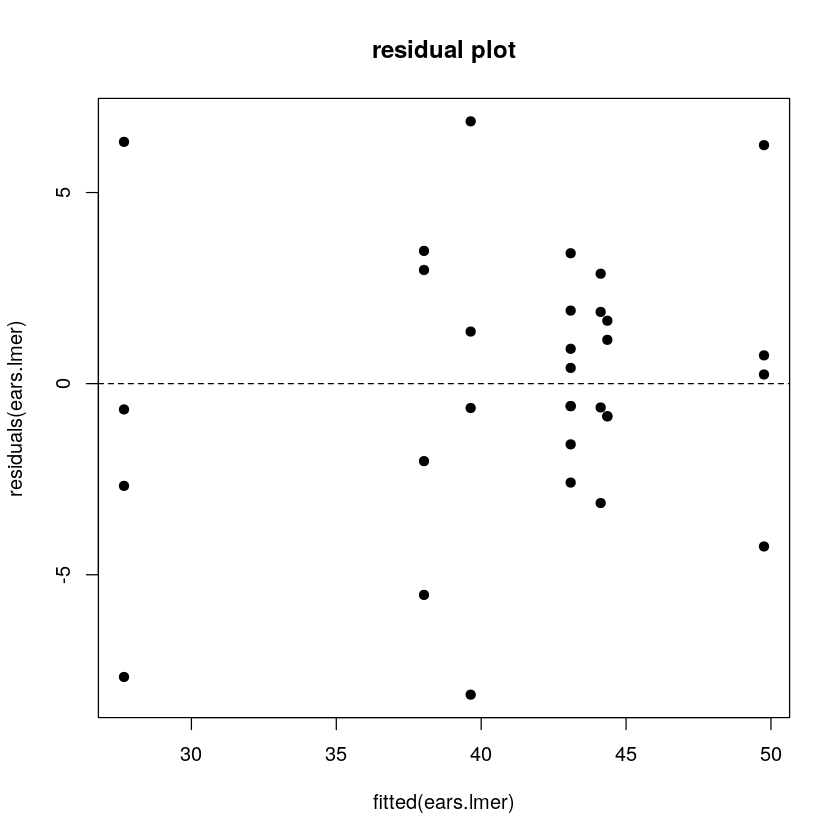

In [14]:
plot(fitted(ears.lmer), residuals(ears.lmer), main="residual plot", pch=19)
abline(h=0, lty=2)

b. The residuals should also be normally distributed. You can check this by making a normal quantile-quantile (QQ) plot. If the points fall along a straight line, the
distribution is approximately normal.

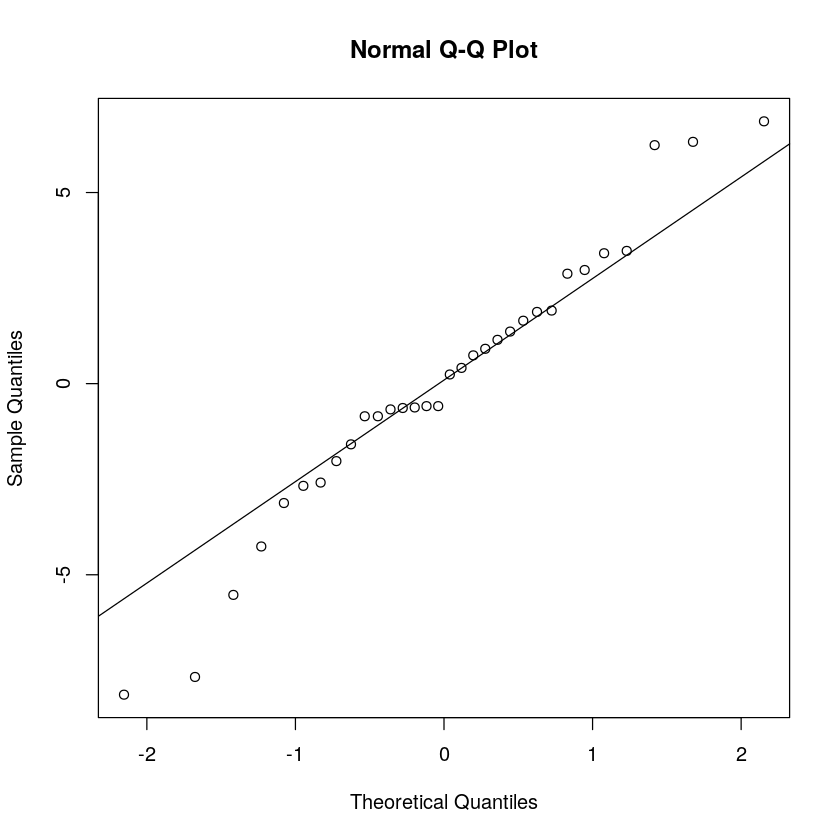

In [15]:
qqnorm(resid(ears.lmer))
qqline(resid(ears.lmer))

What do you conclude?
*I guess it looks normally distributed?*

### 5 Now consider differences between parcels under a variety of conditions
a. Suppose that there was also a parcel V at site WLAN where the data are not recorded, but the corn was grown under the same conditions. Estimate the number of
ears of corn in this parcel. Include a standard error with the estimate.

b. Suppose there was also a parcel VI at the same site as parcel V. What is the standard deviation of the estimated difference in the number of ears of corn in
parcels V and VI?



c. What is the standard deviation of the difference in numbers of ears of corn between two parcels at a new site on the island?

# Rat brain data

### 0 Learn about the rat brain data (`rat.brain` in WWGbook)
We want to examine the effect of treatment on the response
variable activate, while also taking into account region and animal.

In [17]:
library(WWGbook)
?rat.brain

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### 1. Start to explore the data:

In [18]:
attach(rat.brain)
str(rat.brain)
summary(rat.brain)

'data.frame':	30 obs. of  4 variables:
 $ animal   : Factor w/ 5 levels "R100797","R100997",..: 4 4 4 4 4 4 5 5 5 5 ...
 $ treatment: int  1 1 1 2 2 2 1 1 1 2 ...
 $ region   : int  1 2 3 1 2 3 1 2 3 1 ...
 $ activate : num  366 199 187 372 302 ...


     animal    treatment       region     activate    
 R100797:6   Min.   :1.0   Min.   :1   Min.   :179.4  
 R100997:6   1st Qu.:1.0   1st Qu.:1   1st Qu.:261.4  
 R110597:6   Median :1.5   Median :2   Median :406.6  
 R111097:6   Mean   :1.5   Mean   :2   Mean   :402.1  
 R111397:6   3rd Qu.:2.0   3rd Qu.:3   3rd Qu.:493.6  
             Max.   :2.0   Max.   :3   Max.   :727.0  

In order to use treatment and region correctly in the model, they will each need to be coded as a factor (what type of variables
are they now?):

In [19]:
region.f <- region
region.f[region == 1] <- 1
region.f[region == 2] <- 2
region.f[region == 3] <- 0
region.f <- factor(region.f)
levels(region.f) <- c("VST", "BST", "LS")

treat <- factor(treatment)
levels(treat) <- c("Basal","Carbachol")

rat.brain <- data.frame(rat.brain, region.f, treat)

str(rat.brain)
summary(rat.brain)

'data.frame':	30 obs. of  6 variables:
 $ animal   : Factor w/ 5 levels "R100797","R100997",..: 4 4 4 4 4 4 5 5 5 5 ...
 $ treatment: int  1 1 1 2 2 2 1 1 1 2 ...
 $ region   : int  1 2 3 1 2 3 1 2 3 1 ...
 $ activate : num  366 199 187 372 302 ...
 $ region.f : Factor w/ 3 levels "VST","BST","LS": 2 3 1 2 3 1 2 3 1 2 ...
 $ treat    : Factor w/ 2 levels "Basal","Carbachol": 1 1 1 2 2 2 1 1 1 2 ...


     animal    treatment       region     activate     region.f       treat   
 R100797:6   Min.   :1.0   Min.   :1   Min.   :179.4   VST:10   Basal    :15  
 R100997:6   1st Qu.:1.0   1st Qu.:1   1st Qu.:261.4   BST:10   Carbachol:15  
 R110597:6   Median :1.5   Median :2   Median :406.6   LS :10                 
 R111097:6   Mean   :1.5   Mean   :2   Mean   :402.1                          
 R111397:6   3rd Qu.:2.0   3rd Qu.:3   3rd Qu.:493.6                          
             Max.   :2.0   Max.   :3   Max.   :727.0                          

First try to get some idea what the data look like through graphical exploration. Here are a few different representations of the data. Try
them all out - which do you think is most revealing?

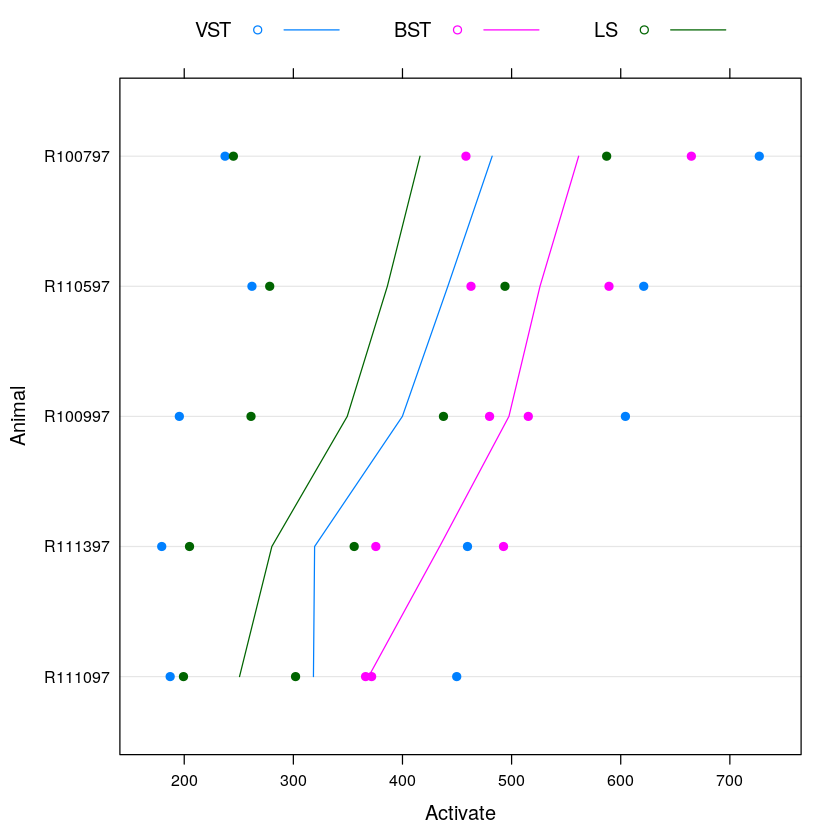

In [20]:
dotplot(reorder(animal, activate) ~ activate, rat.brain,
groups = region.f, ylab = "Animal", xlab = "Activate", pch=19,
type = c("p", "a"), auto.key=list(columns=3, lines=TRUE))

Here we have plotted results for each rat (ordered by increasing mean(activate), but this includes both treatment measurements for
each rat. Let's look at each rat/treatment combination separately:

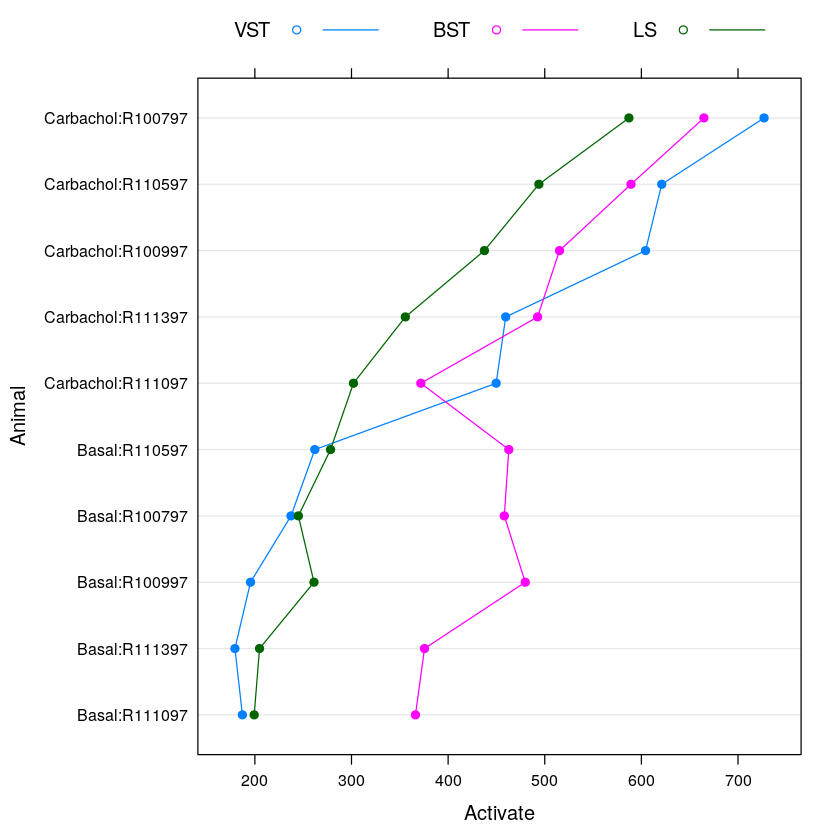

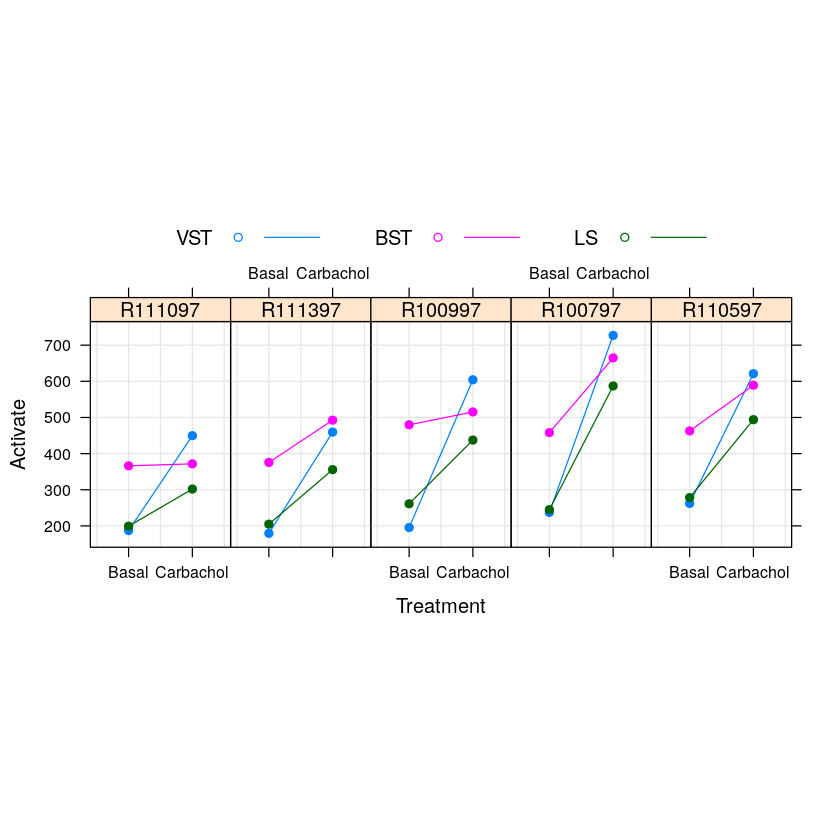

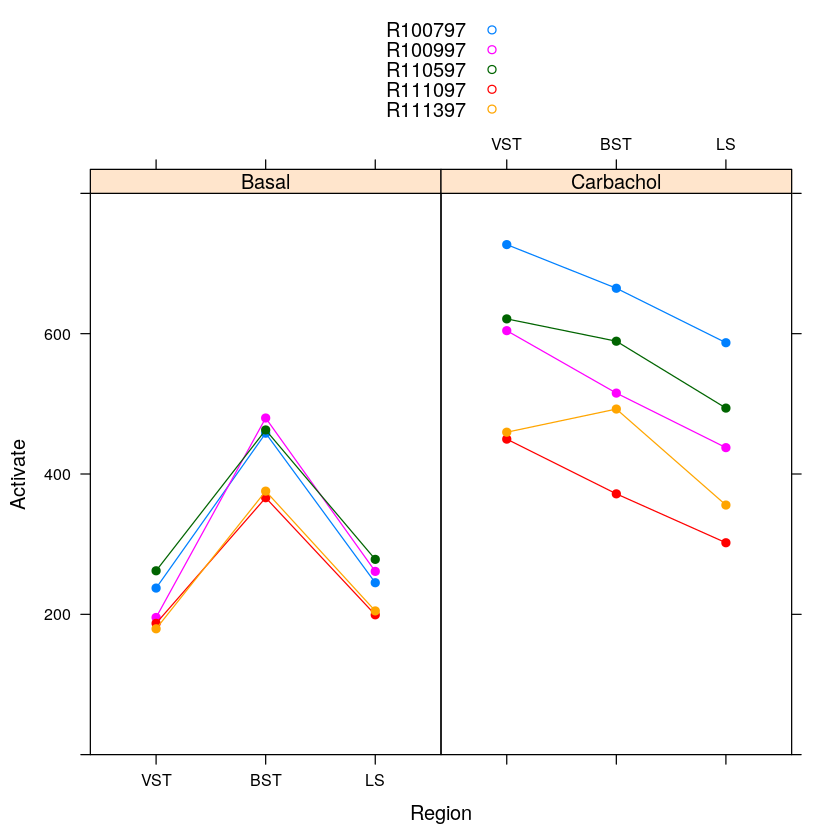

In [21]:
rat.brain$rt <- with(rat.brain, treat:factor(animal))
dotplot(reorder(rt, activate) ~ activate, rat.brain, groups = region.f,
ylab = "Animal", xlab = "Activate", pch=19,
type = c("p", "a"), auto.key=list(columns=3, lines=TRUE))

# Each rat separately:
xyplot(activate ~ treat | animal, rat.brain, aspect = "xy", layout = c(5,1),
groups=region.f, pch=19, type=c("p", "l", "g"),
index.cond = function(x,y) coef(lm(y~x))[1], xlab = "Treatment",
ylab="Activate", auto.key=list(space="top",lines=TRUE,columns=3))

    # Separated by treatment group:
xyplot(activate ~ region.f|treat, rat.brain, groups = animal, pch=19,
ylim=c(0,800), xlab="Region", ylab="Activate",
type = c("p","a"), auto.key = list(space="top"))

Does the treatment appear to have an effect? Why do you say that? Does the effect (if any) appear to be the same in each region? Do
there appear to be rat-specific effects?

### 2 Fit a model including all fixed effects (main effects and interactions for the treatment and region variables
Make
sure to use the factor versions) and a random effect for animal. As above, you can use extractor functions to view some of the model
components.

In [22]:
(rat.brain.lmer1 <- lmer(activate ~ region.f*treat + (1|animal), REML=TRUE, data = rat.brain))

Linear mixed model fit by REML ['lmerModLmerTest']
Formula: activate ~ region.f * treat + (1 | animal)
   Data: rat.brain
REML criterion at convergence: 275.2822
Random effects:
 Groups   Name        Std.Dev.
 animal   (Intercept) 69.64   
 Residual             49.50   
Number of obs: 30, groups:  animal, 5
Fixed Effects:
               (Intercept)                 region.fBST  
                    212.29                      216.21  
                region.fLS              treatCarbachol  
                     25.45                      360.03  
region.fBST:treatCarbachol   region.fLS:treatCarbachol  
                   -261.82                     -162.50  

Make sure that you know how to interpret the coefficients (the interpretation will be determined by the coding).

### 3 From the plot above, we saw that between-animal variation was greater for the carbachol treatment than for the basal treatment
To
accommodate this difference in variation, we can add a random animal-specific effect of treatment to the model. The effect of treatment
is fixed in our original model, therefore constant across all animals. The additional random effect associated with treatment that we
include in the new model allows the implied marginal variance of observations for the carbachol treatment to differ from that for the
basal treatment. (We can also think of the new model as having two random intercepts per rat, one for the carbachol treatment and an
additional one for the basal treatment.)


In [23]:
(rat.brain.lmer2 <- lmer(activate ~ region.f*treat + (treat |animal), REML=TRUE, data =
rat.brain))


Linear mixed model fit by REML ['lmerModLmerTest']
Formula: activate ~ region.f * treat + (treat | animal)
   Data: rat.brain
REML criterion at convergence: 249.1904
Random effects:
 Groups   Name           Std.Dev. Corr
 animal   (Intercept)    35.84        
          treatCarbachol 79.82    0.80
 Residual                23.21        
Number of obs: 30, groups:  animal, 5
Fixed Effects:
               (Intercept)                 region.fBST  
                    212.29                      216.21  
                region.fLS              treatCarbachol  
                     25.45                      360.03  
region.fBST:treatCarbachol   region.fLS:treatCarbachol  
                   -261.82                     -162.50  

What happens to the estimated fixed effects coefficients? What about their standard errors?

### 4 Compare the models using a likelihood ratio (LR) test, carried out with the anova function
The anova method for mer
objects carries out a ML (not REML) LR test, even if the model has been fit by REML. The results are not identical for the two methods,
but in this case the conclusions are the same. We can also test for the presence of random effects (i.e. = 0 or not) using the `ranova`
function:


In [25]:
anova(rat.brain.lmer1, rat.brain.lmer2)
ranova(rat.brain.lmer1)
ranova(rat.brain.lmer2)

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
rat.brain.lmer1,8,341.3376,352.5472,-162.6688,325.3376,NA,NA,NA
rat.brain.lmer2,10,312.7230,326.7349,-146.3615,292.7230,32.61464,2,8.27601e-08


,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
<none>,8,-137.6411,291.2822,NA,NA,NA
(1 | animal),7,-145.6306,305.2611,15.97897,1,6.404994e-05


,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
<none>,10,-124.5952,269.1904,NA,NA,NA
treat in (treat | animal),8,-137.6411,291.2822,26.09171,2,2.159021e-06


a. Which fixed effects are significant? Should any be deleted from the model?
b. Do the variance components appear to be bigger than 0?

### 5 Check some diagnostics for the final model.

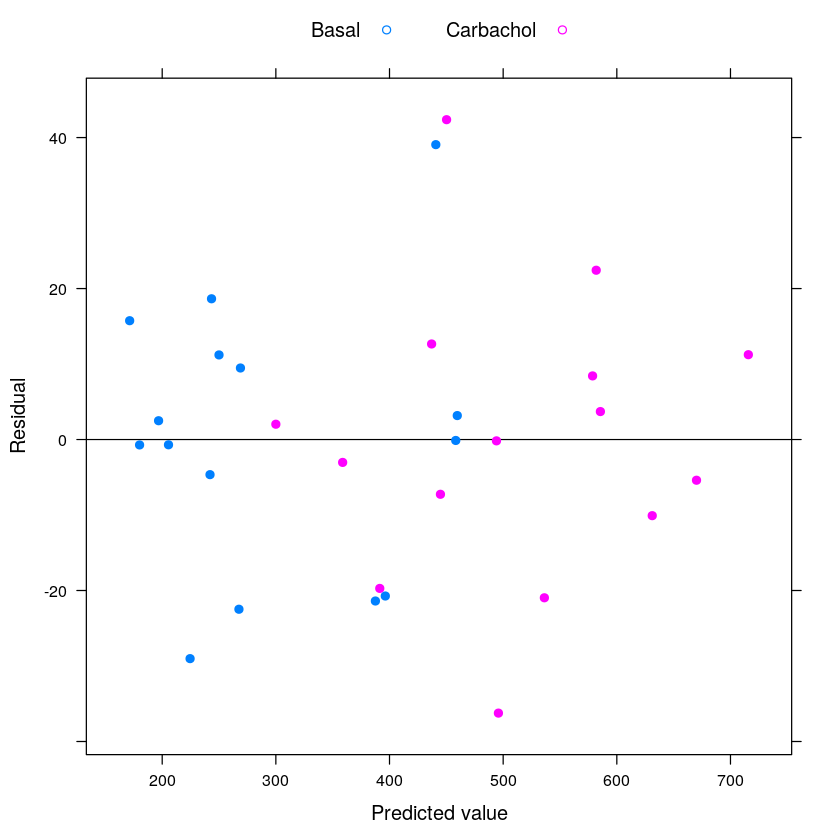

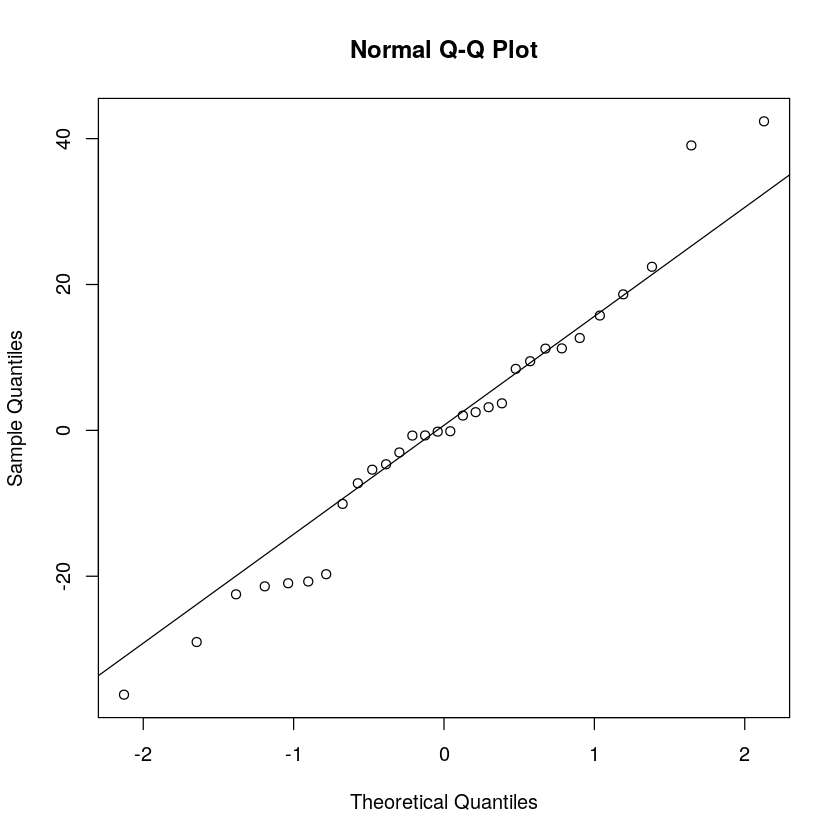

In [26]:
# Residual plot:
fit <- fitted(rat.brain.lmer2)
res <- resid(rat.brain.lmer2)
plotres.fit <- data.frame(rat.brain, fit, res)
xyplot(res ~ fit, data=plotres.fit, groups=treat, pch=19, xlab="Predicted value",
ylab="Residual", abline=0, auto.key=list(space="top", columns=2))
# QQ normal plot:
qqnorm(resid(rat.brain.lmer2))
qqline(resid(rat.brain.lmer2))

What do you conclude?

### 6 (Optional) Explanation about technical difficulties with p-values
in these models, read:
`m?pvalues`